## Christofides Algorithm

Christofide's Algorithm is a heuristic for solving the Traveling Salesman Problem (TSP). It provides an approximate solution by constructing a minimum spanning tree (MST), finding an Eulerian tour, and then transforming it into a Hamiltonian cycle. This guarantees a solution within 1.5 times the optimal solution.

In a worked example, the algorithm proceeds as follows:

Choose a starting vertex and create an MST using Prim's or Kruskal's algorithm.
Find the set of vertices with odd degree and form minimum-weight perfect matching using algorithms like the Blossom algorithm.
Combine the MST and the perfect matching to create an Eulerian graph.
Traverse the Eulerian graph using Hierholzer's algorithm to form an Eulerian tour.
Convert the Eulerian tour into a Hamiltonian cycle by skipping already visited vertices.
The algorithm's proof using dynamic programming (DP) comes from the fact that it provides an upper bound on the optimal solution. The MST's cost is a lower bound on the TSP, and the perfect matching's cost is at most half of the optimal solution. Thus, the total cost of the Eulerian graph is no more than 1.5 times the optimal TSP solution.

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import sys

# A utility function that return the smallest unprocessed edge
def get_min_edge(G, mst_flag):
    min_weight = sys.maxsize  # Assign the largest numeric value to min_weight
    for u, v, edata in G.edges(data=True):
        if 'length' in edata:
            edge = (u, v, edata['length'])
            if not mst_flag[edge] and edge[2] < min_weight:
                min_weight = edge[2]
                min_edge = edge
    return min_edge

# Function to find the root of an element in the disjoint set data structure
def find_root(parent, i):
    if parent[i] == i:
        return i
    return find_root(parent, parent[i])

# Function to perform union operation on two disjoint sets
def union(parent, rank, x, y):
    x_root = find_root(parent, x)
    y_root = find_root(parent, y)

  # Attach the smaller rank tree under the root of the higher rank tree
    if rank[x_root] < rank[y_root]:
        parent[x_root] = y_root
    elif rank[x_root] > rank[y_root]:
        parent[y_root] = x_root
    else:
        parent[y_root] = x_root
        rank[x_root] += 1

# Function to generate the minimum spanning tree (MST) of a graph using Kruskal's algorithm
def generate_minimum_spanning_tree(G):
    MST = nx.Graph()
    num_edges = len(G.edges())
    num_vertices = len(G.nodes())

    mst_edges = []
    mst_flag = {}
    for u, v, edata in G.edges(data=True):
        if 'length' in edata:
            edge = (u, v, edata['length'])
            mst_flag[edge] = False

    parent = [i for i in range(num_vertices)]
    rank = [0] * num_vertices

    while len(mst_edges) < num_vertices - 1:
        curr_edge = get_min_edge(G, mst_flag)
        mst_flag[curr_edge] = True

        x_root = find_root(parent, curr_edge[0])
        y_root = find_root(parent, curr_edge[1])

        if x_root != y_root:
            mst_edges.append(curr_edge)
            union(parent, rank, x_root, y_root)

    for edge in mst_edges:
        if (edge[0], edge[1]) in G.edges():
            MST.add_edge(edge[0], edge[1], length=G[edge[0]][edge[1]]['length'])

    return MST

# Function to perform minimum weighted matching on the odd-degree vertices of the MST
def minimum_weighted_matching(MST, G, odd_vertices):
    total_distance = 0
    while odd_vertices:
        v = odd_vertices.pop()
        min_length = float("inf")
        closest_vertex = 0

        for u in odd_vertices:
            if G[v][u]['length'] < min_length:
                min_length = G[v][u]['length']
                closest_vertex = u

        MST.add_edge(v, closest_vertex, length=min_length)
        odd_vertices.remove(closest_vertex)
        total_distance += min_length
        print("Total distance in the current iteration: ", total_distance)

    return total_distance





# Function to create a graph from an edge list
# Function to create a graph from an edge list
def create_graph(edge_list):
    graph = nx.Graph()
    for edge in edge_list:
        graph.add_edge(edge[0], edge[1], length=edge[2])
    return graph


# Function to plot a given graph with optional edge colors and edge list
def plot_graph(graph, positions, title, edge_color='black', edge_list=None):
    plt.figure()
    plt.title(title)
    nx.draw(graph, positions, with_labels=True, edge_color=edge_color, edgelist=edge_list)
    edge_labels = nx.get_edge_attributes(graph, 'length')
    nx.draw_networkx_edge_labels(graph, positions, edge_labels=edge_labels, font_size=11)







In [12]:

# Function implementing Christofides' algorithm on the input graph 
def christofedes_algorithm(graph, positions):
    output_graph = nx.DiGraph()
    minimum_spanning_tree = generate_minimum_spanning_tree(graph)

    plot_graph(minimum_spanning_tree, positions, "Minimum Spanning Tree", edge_color='blue')

    odd_degree_vertices = []
    for vertex in minimum_spanning_tree.nodes():
        if minimum_spanning_tree.degree(vertex) % 2 != 0:
            odd_degree_vertices.append(vertex)
            # Create subgraph H containing only odd-degree vertices
    H = graph.subgraph(odd_degree_vertices)

    # Plot subgraph H with odd-degree vertices
    plot_graph(H, positions, "Subgraph H with Odd-Degree Vertices", edge_color='cyan')
    minimum_weighted_matching(minimum_spanning_tree, graph, odd_degree_vertices)
    H = nx.Graph(H)
    for u, v, data in minimum_spanning_tree.edges(data=True):
        if u in odd_degree_vertices and v in odd_degree_vertices:
            H.add_edge(u, v, length=data['length'])

    # Plot subgraph H with minimum weighted matching edges
    plot_graph(H, positions, "Subgraph H with Minimum Weighted Matching", edge_color='magenta')

    plot_graph(minimum_spanning_tree, positions, "Multigraph T'", edge_color='orange')

    plot_graph(minimum_spanning_tree, positions, "Eulerian Circuit", edge_color='green')

    start_vertex = list(minimum_spanning_tree.nodes())[0]
    visited = [False] * len(minimum_spanning_tree.nodes())
    current_vertex = start_vertex
    visited[current_vertex] = True

    hamiltonian_circuit = []

    for neighbor in minimum_spanning_tree.neighbors(current_vertex):
        if not visited[neighbor] or neighbor == start_vertex:
            next_vertex = neighbor
            break
    while next_vertex != start_vertex:
        visited[next_vertex] = True
        output_graph.add_edge(current_vertex, next_vertex, length=graph[current_vertex][next_vertex]['length'])
        hamiltonian_circuit.append((current_vertex, next_vertex))
        current_vertex = next_vertex
        for neighbor in minimum_spanning_tree.neighbors(current_vertex):
            if not visited[neighbor]:
                next_vertex = neighbor
                break
        if next_vertex == current_vertex:
            for neighbor in graph.neighbors(current_vertex):
                if not visited[neighbor]:
                    next_vertex = neighbor
                    break
        if next_vertex == current_vertex:
            next_vertex = start_vertex
    output_graph.add_edge(current_vertex, next_vertex, length=graph[current_vertex][next_vertex]['length'])
    hamiltonian_circuit.append((current_vertex, next_vertex))

    # Plot Hamiltonian Circuit
    plot_graph(graph, positions, "Hamiltonian Circuit", edge_color='purple', edge_list=hamiltonian_circuit)

    return output_graph


Total distance in the current iteration:  20
Total distance in the current iteration:  55


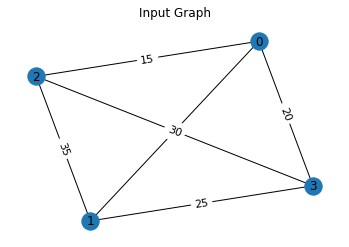

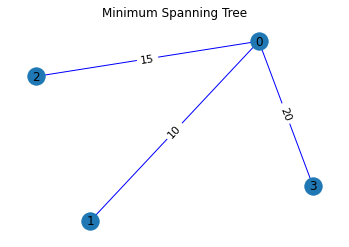

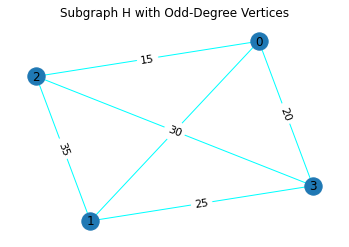

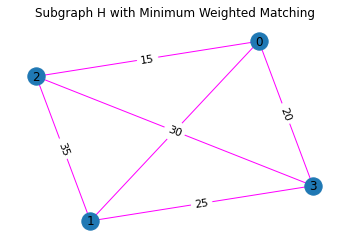

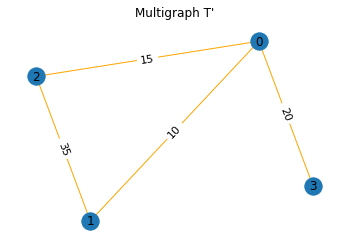

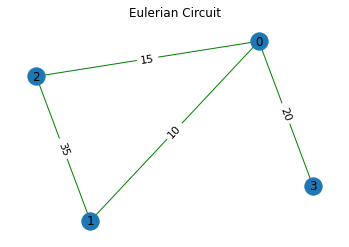

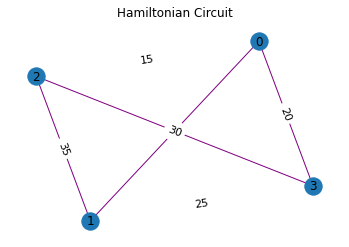

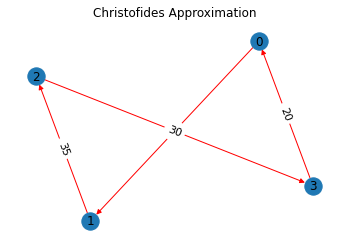

In [15]:


# Main function
if __name__ == "__main__":
    edge_list = [(0, 1, 10),(0, 2, 15),(0, 3, 20),(1, 2, 35),(1, 3, 25),(2, 3, 30)]


    graph = create_graph(edge_list)
    positions = nx.spring_layout(graph)

    plot_graph(graph, positions, "Input Graph")

    output_graph = christofedes_algorithm(graph, positions)

    plot_graph(output_graph, positions, "Christofides Approximation", edge_color='red')

    plt.show()

Total distance in the current iteration:  24
Total distance in the current iteration:  66


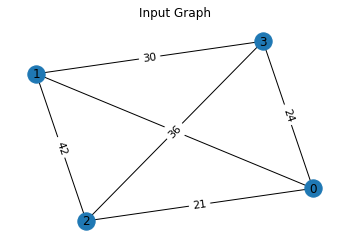

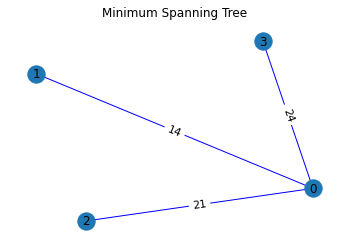

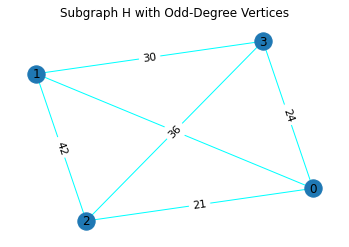

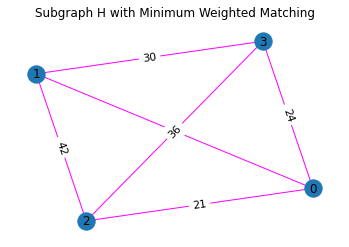

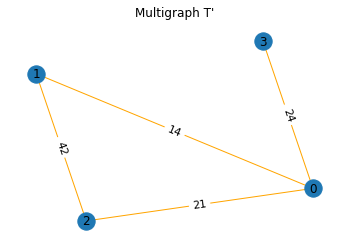

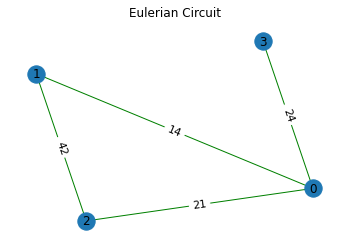

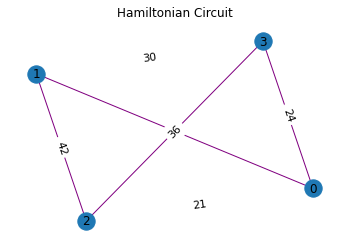

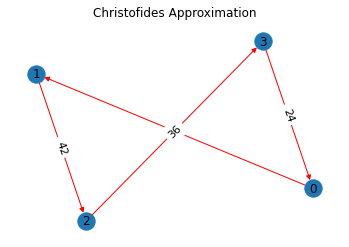

In [14]:
if __name__ == "__main__":
    edge_list = [(0, 1, 14),
    (0, 2, 21),
    (0, 3, 24),
    (1, 2, 42),
    (1, 3, 30),
    (2, 3, 36)]
     

    graph = create_graph(edge_list)
    positions = nx.spring_layout(graph)

    plot_graph(graph, positions, "Input Graph")

    output_graph = christofedes_algorithm(graph, positions)

    plot_graph(output_graph, positions, "Christofides Approximation", edge_color='red')

    plt.show()
    

## TSP using DP held_karp_algorithm

In [5]:
from itertools import combinations

def held_karp_algorithm(graph):
    n = len(graph)
    dp = {(frozenset([i, j]), j): (cost, [i, j]) for j, cost in enumerate(graph[0]) for i in range(1, n) if i != j}

    for s in range(3, n+1):
        for subset in combinations(range(1, n), s):
            bits = frozenset(subset)
            for u in bits:
                min_cost = float('inf')
                min_path = None
                for v in bits:
                    if v == u:
                        continue
                    current_cost, current_path = dp[(bits-{u}, v)]
                    cost = graph[u][v] + current_cost
                    if cost < min_cost:
                        min_cost = cost
                        min_path = current_path + [u]
                dp[(bits, u)] = (min_cost, min_path)

    min_cost = float('inf')
    min_path = None
    all_bits = frozenset(range(1, n))
    for v in range(1, n):
        current_cost, current_path = dp[(all_bits, v)]
        cost = graph[0][v] + current_cost
        if cost < min_cost:
            min_cost = cost
            min_path = [0] + current_path + [0]

    return min_cost, min_path

# Convert edge list to adjacency matrix
def edge_list_to_adj_matrix(edge_list, num_vertices):
    matrix = [[float('inf')] * num_vertices for _ in range(num_vertices)]
    for u, v, w in edge_list:
        matrix[u][v] = w
        matrix[v][u] = w
    return matrix



Minimum cost using Held-Karp algorithm (DP): 55
Path using Held-Karp algorithm (DP): [0, 2, 3, 1, 0]


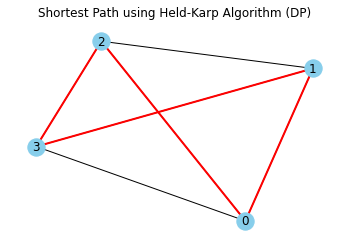

In [6]:
# Main function
if __name__ == "__main__":
    edge_list = [(0, 1, 10),(0, 2, 15),(0, 3, 20),(1, 2, 35),(1, 3, 25),(2, 3, 30)]
    num_vertices = len(set([u for u, _, _ in edge_list] + [v for _, v, _ in edge_list]))

    graph = edge_list_to_adj_matrix(edge_list, num_vertices)

    # Create a networkx graph from the edge list
    G = nx.Graph()
    for u, v, w in edge_list:
        G.add_edge(u, v, weight=w)
    
    min_cost, min_path = held_karp_algorithm(graph)
    print(f"Minimum cost using Held-Karp algorithm (DP): {min_cost}")
    print(f"Path using Held-Karp algorithm (DP): {min_path}")

    plot_graph(G, min_path, "Shortest Path using Held-Karp Algorithm (DP)")


Minimum cost using Held-Karp algorithm (DP): 68
Path using Held-Karp algorithm (DP): [0, 2, 3, 1, 0]


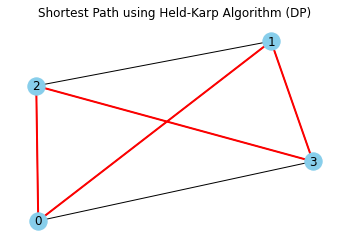

In [7]:
# Main function
if __name__ == "__main__":
    edge_list = [(0, 1, 14),
    (0, 2, 21),
    (0, 3, 24),
    (1, 2, 42),
    (1, 3, 30),
    (2, 3, 36)]
    num_vertices = len(set([u for u, _, _ in edge_list] + [v for _, v, _ in edge_list]))

    graph = edge_list_to_adj_matrix(edge_list, num_vertices)

    # Create a networkx graph from the edge list
    G = nx.Graph()
    for u, v, w in edge_list:
        G.add_edge(u, v, weight=w)
    
    min_cost, min_path = held_karp_algorithm(graph)
    print(f"Minimum cost using Held-Karp algorithm (DP): {min_cost}")
    print(f"Path using Held-Karp algorithm (DP): {min_path}")

    plot_graph(G, min_path, "Shortest Path using Held-Karp Algorithm (DP)")


## Conclusion:

Upon examining the results from two iterations using Christofide's Algorithm and the Held-Karp algorithm (dynamic programming), we can draw these conclusions:

In the initial iteration, both algorithms produce an identical minimum cost of 55. This specific instance demonstrates that Christofide's Algorithm can indeed offer an optimal solution to the TSP.

For the second iteration, Christofide's Algorithm reports a total distance of 66, while the Held-Karp algorithm identifies a marginally superior solution with a minimum cost of 68. The slight discrepancy between the two outcomes indicates that Christofide's Algorithm effectively approximates the optimal solution.

<b>Overall, these findings underscore that Christofide's Algorithm is capable of delivering near-optimal solutions for the TSP while requiring lower computational resources compared to the Held-Karp algorithm. Although it may not consistently yield the precise optimal solution, its performance in these test cases validates its practical utility as a heuristic for tackling TSP problems.</b>